## Importing Libraries

In [ ]:
!pip install kora -q
!pip install selenium
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kora.selenium import wd as browser
from selenium.webdriver.common.by import By
import pandas as pd 
import time
from datetime import date,datetime as dt
import datetime
import numpy as np
import re 
import bs4
from bs4 import BeautifulSoup as bs
import requests
from kora.selenium import wd  as browser
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import plotly.express as px


## Details about mobile

In [ ]:
link = "https://www.flipkart.com/redmi-note-9-aqua-green-128-gb/p/itme28e86170ace6?pid=MOBFU3ZFY6FGK4ZU&lid=LSTMOBFU3ZFY6FGK4ZUTQ6GRE&marketplace=FLIPKART&q=REDMI+NOTE+9&store=tyy%2F4io&srno=s_1_2&otracker=AS_Query_HistoryAutoSuggest_2_0&otracker1=AS_Query_HistoryAutoSuggest_2_0&fm=organic&iid=18902662-c5db-4a80-b51c-3653a0dc0b64.MOBFU3ZFY6FGK4ZU.SEARCH&ppt=hp&ppn=homepage&ssid=3s0h18epu80000001664518440152&qH=f967317f3cd3bb2d"


In [ ]:
page = requests.get(link)

In [ ]:
page.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.104e9a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" 

In [ ]:
soup = bs(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE doctype html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.104e9a.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"

In [ ]:
# Model name 
name=soup.find('h1',class_="yhB1nd")
print(name.text)

REDMI Note 9 (Aqua Green, 128 GB)  (4 GB RAM)


In [ ]:
# Overall rating REDMI Note 9 (Aqua Green, 128 GB)  (4 GB RAM)
rating=soup.find('div',class_="_3LWZlK")
print(rating.text)

4.3


In [ ]:
# Model specification.
specification = soup.find("div", class_="_2418kt")
print(specification)

<div class="_2418kt"><ul><li class="_21Ahn-">4 GB RAM | 128 GB ROM | Expandable Upto 512 GB</li><li class="_21Ahn-">16.59 cm (6.53 inch) Full HD+ Display</li><li class="_21Ahn-">48MP + 8MP + 2MP + 2MP | 13MP Front Camera</li><li class="_21Ahn-">5020 mAh Battery</li><li class="_21Ahn-">MediaTek Helio G85 Processor</li></ul></div>


In [ ]:
# Specification
for each in specification:
  spec = each.find_all('li', class_="_21Ahn-")
  print(spec[0].text)
  print(spec[1].text)
  print(spec[2].text)
  print(spec[3].text)
  print(spec[4].text)


4 GB RAM | 128 GB ROM | Expandable Upto 512 GB
16.59 cm (6.53 inch) Full HD+ Display
48MP + 8MP + 2MP + 2MP | 13MP Front Camera
5020 mAh Battery
MediaTek Helio G85 Processor


## Making a ***Scraper***

In [ ]:
flipkart = []

In [ ]:
for i in range(1,500):
    url=f"https://www.flipkart.com/redmi-note-9-aqua-green-128-gb/product-reviews/itme28e86170ace6?pid=MOBFU3ZFY6FGK4ZU&lid=LSTMOBFU3ZFY6FGK4ZUTQ6GRE&marketplace=FLIPKART&page={i}"
    browser.get(url)
    xx= browser.find_elements(By.XPATH,"//span[@class='_1BWGvX']")
    def click(p):
        try:
            p.click()
        except:
            pass
  
    d_x=[click(x) for x in xx]
    containers=[x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,'//div[@class="col _2wzgFH K0kLPL"]')]

    for container in containers:
        rev1=dict()
        bsObj=BeautifulSoup(container)
        review=bsObj.find('p').text
        print(review)
     
        rev=bsObj.find('div',attrs={"class":"t-ZTKy"}).text.strip()
        print(rev)
        
        try:
            try:
                rating=bsObj.find('div',attrs={"class":"_3LWZlK _1BLPMq"}).text.strip()
                rating=int(float(rating[0]))
            except:
                rating=bsObj.find('div',attrs={"class":"_3LWZlK _32lA32 _1BLPMq"}).text.strip()
                rating=int(float(rating[0]))
        except:
            rating=bsObj.find('div',attrs={"class":"_3LWZlK _1rdVr6 _1BLPMq"}).text.strip()
            rating=int(float(rating[0]))
            
    
        rev1["rating"]=rating
        rev1["review"]=review+" "+rev
        flipkart.append(rev1)

Simply awesome
It is good quality .good camera.. good battery .. good display ..😊😊😊👌👌👌 loved itREAD MORE
Best in the market!
I purshase this phone for my father..This phone has come with a awesome specifications and features as well.The processor helio G85 along with gorilla glass 5 protection is the best part of this phone.. primary camera comes with 1.8 aperture and 395ppi having great deal at this price range. I'm pretty much happy with this phone...This is very good device for not only for parents but also for the new mobile phone users..READ MORE
Must buy!
Just wow. Very very nice quality at this rate. Nice product.The camera is also good and the charger also. Allover a good product at this budget. It is too good.READ MORE
Wonderful
Very nice products loved it better for usages camera clarity is clear and awesome👏👏👍👍 Good job REDMIREAD MORE
Worth every penny
Batery is good .display is good charging takes 2 hours time camera photos come good but camera videos are not so good except

In [ ]:
flipkart_reviews = pd.DataFrame(flipkart)

In [ ]:
flipkart_reviews

,rating,review
0,5,Simply awesome It is good quality .good camera...
1,5,Best in the market! I purshase this phone for ...
2,5,Must buy! Just wow. Very very nice quality at ...
3,4,Wonderful Very nice products loved it better f...
4,5,Worth every penny Batery is good .display is g...
...,...,...
663,4,Value-for-money Its goodREAD MORE
664,5,Wonderful Very niceREAD MORE
665,5,Just wow! Like it...good phoneREAD MORE
666,5,Super! GoodREAD MORE


In [ ]:
flipkart_reviews

,rating,review
0,5,Simply awesome It is good quality .good camera...
1,5,Best in the market! I purshase this phone for ...
2,5,Must buy! Just wow. Very very nice quality at ...
3,4,Wonderful Very nice products loved it better f...
4,5,Worth every penny Batery is good .display is g...
...,...,...
663,4,Value-for-money Its goodREAD MORE
664,5,Wonderful Very niceREAD MORE
665,5,Just wow! Like it...good phoneREAD MORE
666,5,Super! GoodREAD MORE


In [ ]:
flipkart_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  668 non-null    int64 
 1   review  668 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.6+ KB


In [ ]:
flipkart_reviews.to_csv(r'Flipkart.csv', index= False, header=True)

##WordClouds and EDA

In [ ]:
fig = px.pie(flipkart_reviews['rating'].value_counts().reset_index(), values='rating', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
layout = dict(title = 'Rating distribution on flipkart')
plt.savefig('rating_count.png')
fig.show()

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# review length
review_length = flipkart_reviews["review"].dropna().map(lambda x: len(x))


In [ ]:
length_df= pd.DataFrame(review_length)

In [ ]:
length_df


,review
0,104
1,452
2,179
3,119
4,213
...,...
663,33
664,28
665,39
666,20


In [ ]:
fig = px.histogram(length_df, x='review',nbins = 10,
                   title='Distribution of reviews by its length',
                   color_discrete_sequence=['indianred'] )
fig.update_xaxes(categoryorder='total descending')
plt.savefig('hist.png')
fig.show()

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

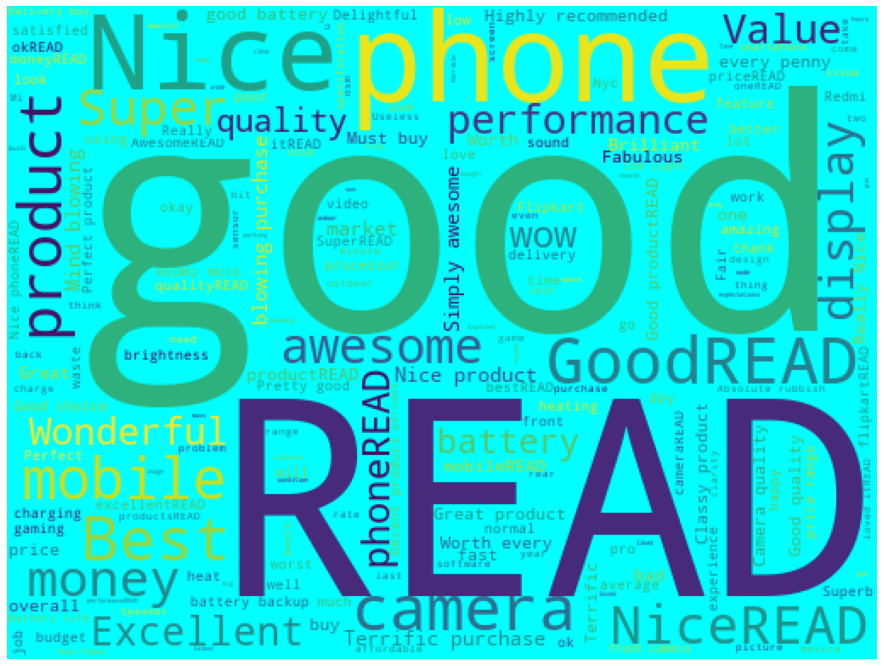

In [ ]:
text = flipkart_reviews['review']

plt.subplots(figsize = (18,12))

wordcloud = WordCloud (
                    background_color = 'cyan',
                    width = 512,
                    height = 384
                        ).generate(' '.join(text))
plt.imshow(wordcloud) 
plt.axis('off')
plt.savefig('Plotly-World_Cloud.png')
plt.show()

In [ ]:
tf = CountVectorizer(token_pattern = "[a-z']+", max_df = 0.6, min_df=10, stop_words =STOPWORDS)

In [ ]:
tf_mat = tf.fit_transform(flipkart_reviews.review)
tf_mat


<668x78 sparse matrix of type '<class 'numpy.int64'>'
	with 2939 stored elements in Compressed Sparse Row format>

In [ ]:
tf.vocabulary_

{'simply': 69,
 'awesome': 1,
 'good': 27,
 'quality': 62,
 'camera': 11,
 'battery': 4,
 'display': 18,
 'itread': 32,
 'best': 5,
 'market': 35,
 'phone': 52,
 'processor': 58,
 'great': 29,
 'price': 56,
 'range': 64,
 'pretty': 55,
 'much': 40,
 'mobile': 37,
 'read': 65,
 'must': 41,
 'buy': 10,
 'wow': 77,
 'nice': 42,
 'product': 59,
 'budget': 9,
 'wonderful': 75,
 'better': 6,
 'worth': 76,
 'every': 19,
 'penny': 49,
 'charging': 12,
 'thank': 72,
 'flipkart': 25,
 'delivery': 17,
 'delightful': 16,
 'love': 33,
 'super': 70,
 'productread': 60,
 'perfect': 50,
 'fast': 24,
 'redmi': 68,
 'note': 44,
 'excellent': 20,
 'purchase': 61,
 'performance': 51,
 'priceread': 57,
 'really': 66,
 'use': 73,
 'value': 74,
 'money': 39,
 'low': 34,
 'highly': 31,
 'recommended': 67,
 'terrific': 71,
 'okay': 45,
 'poor': 54,
 'mind': 36,
 'blowing': 7,
 'one': 47,
 'overall': 48,
 'front': 26,
 'backup': 2,
 'classy': 14,
 'amazing': 0,
 'qualityread': 63,
 'heating': 30,
 'fabulous': 2

In [ ]:
tf_vocab_reverse = {v:k for k,v in tf.vocabulary_.items()}
tf_vocab_reverse

{69: 'simply',
 1: 'awesome',
 27: 'good',
 62: 'quality',
 11: 'camera',
 4: 'battery',
 18: 'display',
 32: 'itread',
 5: 'best',
 35: 'market',
 52: 'phone',
 58: 'processor',
 29: 'great',
 56: 'price',
 64: 'range',
 55: 'pretty',
 40: 'much',
 37: 'mobile',
 65: 'read',
 41: 'must',
 10: 'buy',
 77: 'wow',
 42: 'nice',
 59: 'product',
 9: 'budget',
 75: 'wonderful',
 6: 'better',
 76: 'worth',
 19: 'every',
 49: 'penny',
 12: 'charging',
 72: 'thank',
 25: 'flipkart',
 17: 'delivery',
 16: 'delightful',
 33: 'love',
 70: 'super',
 60: 'productread',
 50: 'perfect',
 24: 'fast',
 68: 'redmi',
 44: 'note',
 20: 'excellent',
 61: 'purchase',
 51: 'performance',
 57: 'priceread',
 66: 'really',
 73: 'use',
 74: 'value',
 39: 'money',
 34: 'low',
 31: 'highly',
 67: 'recommended',
 71: 'terrific',
 45: 'okay',
 54: 'poor',
 36: 'mind',
 7: 'blowing',
 47: 'one',
 48: 'overall',
 26: 'front',
 2: 'backup',
 14: 'classy',
 0: 'amazing',
 63: 'qualityread',
 30: 'heating',
 22: 'fabulous

#Analyzing using TFIDF

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
data_1 = flipkart_reviews[~flipkart_reviews['review'].isnull()]
data_1.shape

(668, 2)

In [ ]:
data_1.rating.value_counts()

5    433
4    139
3     52
1     29
2     15
Name: rating, dtype: int64

In [ ]:
train_data = data_1.iloc[:500]
test_data = data_1.iloc[500:]

In [ ]:
(train_data.shape, test_data.shape)

((500, 2), (168, 2))

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_data.iloc[:,1:],
                                                  train_data.iloc[:,0],
                                                  test_size=0.4,
                                                  random_state = 123456)

In [ ]:
x_train.shape

(300, 1)

In [ ]:
from wordcloud import STOPWORDS

In [ ]:
tfidf = TfidfVectorizer(stop_words=STOPWORDS, token_pattern="[a-z']+", 
                        max_df=0.55, min_df=10)

In [ ]:
tfidf_mat_train = tfidf.fit_transform(x_train['review'])
tfidf_mat_val = tfidf.transform(x_val['review'])
tfidf_mat_test = tfidf.transform(test_data['review'])

In [ ]:
lr_model_1 = LogisticRegression()
lr_model_1.fit(X=tfidf_mat_train, y=y_train)

LogisticRegression()

In [ ]:
pred_val_lr = lr_model_1.predict(tfidf_mat_val)
cohen_kappa_score(pred_val_lr, y_val)

0.3223262690980778

In [ ]:
N =40
svd = TruncatedSVD(n_components=N)
svd_mat_train = svd.fit_transform(tfidf_mat_train)
svd_mat_val = svd.transform(tfidf_mat_val)
svd_mat_test = svd.transform(tfidf_mat_test)

In [ ]:
lr_model_2 = LogisticRegression()
lr_model_2.fit(X=svd_mat_train, y=y_train)
pred_val_lr2 = lr_model_2.predict(svd_mat_val)
cohen_kappa_score(pred_val_lr2, y_val)

0.30631617378605347

In [ ]:
gbm = GradientBoostingClassifier(learning_rate=0.01, 
                                 n_estimators=2000, max_depth=1)

In [ ]:
gbm_1 = gbm.fit(X=svd_mat_train, y=y_train)
pred_val_gbm1 = gbm_1.predict(svd_mat_val)
cohen_kappa_score(pred_val_gbm1, y_val)

0.39406824705006926

##SPACY

In [ ]:
import spacy
import pandas as pd
import numpy as np

In [ ]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2022-09-30 08:17:26.277970: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 9.8 kB/s 
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.5.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incomp

In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
fp_rev = flipkart_reviews.iloc[0,:]["review"]

In [ ]:
texts = nlp(fp_rev)

In [ ]:
for token in texts[:1000]:
  print(token.text, token.pos_)

Simply ADV
awesome ADJ
It PRON
is AUX
good ADJ
quality NOUN
.good PUNCT
camera NOUN
.. PUNCT
good ADJ
battery NOUN
.. PUNCT
good ADJ
display NOUN
.. PUNCT
😊 NOUN
😊 NOUN
😊 NOUN
👌 SPACE
👌 X
👌 ADJ
loved VERB
itREAD ADV
MORE ADJ


In [ ]:
list(texts.noun_chunks)[:100]

[It, good quality, .good camera, good display, 😊, 😊, 😊]

In [ ]:
for ent in texts.ents:
  print(ent.text, ent.label_)

itREAD GPE


In [ ]:
#To find dependencies (Dependency Parsing)

for token in texts:
  if token.ent_type_ == 'ORG':
    txt = " ".join([i.text for i in token.subtree])
    if txt !=token.text:
      print(token.text, token.dep_, " ".join([i.text for i in token.subtree]))


In [ ]:
from spacy import displacy

In [ ]:
sent1 = list(texts.sents)
sent1

[Simply awesome,
 It is good quality .good camera..,
 good battery .. good display ..😊😊😊👌👌👌 loved itREAD MORE]

In [ ]:
displacy.render(sent1, jupyter = True)

##Entity Recognizer

In [ ]:
data = flipkart_reviews['review'].values.tolist()

str=''
for i in data:
  #print(i)
  str=str+''.join(i)
  str=str.lower()
str

'simply awesome it is good quality .good camera.. good battery .. good display ..😊😊😊👌👌👌 loved itread morebest in the market! i purshase this phone for my father..this phone has come with a awesome specifications and features as well.the processor helio g85 along with gorilla glass 5 protection is the best part of this phone.. primary camera comes with 1.8 aperture and 395ppi having great deal at this price range. i\'m pretty much happy with this phone...this is very good device for not only for parents but also for the new mobile phone users..read moremust buy! just wow. very very nice quality at this rate. nice product.the camera is also good and the charger also. allover a good product at this budget. it is too good.read morewonderful very nice products loved it better for usages camera clarity is clear and awesome👏👏👍👍 good job redmiread moreworth every penny batery is good .display is good charging takes 2 hours time camera photos come good but camera videos are not so good except c

In [ ]:
sent2 = nlp(str)
sent2.user_data["title"] = "Entity Recognizer"
displacy.render(sent2, style="ent", jupyter=True)

In [ ]:
def ent_relation(txt):
  output = []
  doc = nlp(txt)
  for token in doc:
    if token.dep_ == 'nsubj':
      words = [w for w in token.head.rights]
      for wo in words:
        if wo.dep_ in ['acomp', 'amod']:
          output.append((token.orth_, ' '.join([w.text for w in wo.subtree])))
  return(output)

In [ ]:
ent_relation(texts)

[]

##GENSIM

In [ ]:
import gensim

In [ ]:
flipkart_reviews

,rating,review
0,5,Simply awesome It is good quality .good camera...
1,5,Best in the market! I purshase this phone for ...
2,5,Must buy! Just wow. Very very nice quality at ...
3,4,Wonderful Very nice products loved it better f...
4,5,Worth every penny Batery is good .display is g...
...,...,...
663,4,Value-for-money Its goodREAD MORE
664,5,Wonderful Very niceREAD MORE
665,5,Just wow! Like it...good phoneREAD MORE
666,5,Super! GoodREAD MORE


In [ ]:
only_reviews = flipkart_reviews.review

In [ ]:
only_reviews1 = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews]

In [ ]:
only_reviews1 = [gensim.parsing.remove_stopwords(rev) for rev in only_reviews1]

In [ ]:
tokens = [list(gensim.utils.tokenize(rev)) for rev in only_reviews1]
tokens

[['simply',
  'awesome',
  'good',
  'quality',
  'good',
  'camera',
  'good',
  'battery',
  'good',
  'display',
  'loved',
  'itread'],
 ['best',
  'market',
  'purshase',
  'phone',
  'father',
  'this',
  'phone',
  'come',
  'awesome',
  'specifications',
  'features',
  'well',
  'the',
  'processor',
  'helio',
  'g',
  'gorilla',
  'glass',
  'protection',
  'best',
  'phone',
  'primary',
  'camera',
  'comes',
  'aperture',
  'ppi',
  'having',
  'great',
  'deal',
  'price',
  'range',
  'i',
  'm',
  'pretty',
  'happy',
  'phone',
  'this',
  'good',
  'device',
  'parents',
  'new',
  'mobile',
  'phone',
  'users',
  'read'],
 ['buy',
  'wow',
  'nice',
  'quality',
  'rate',
  'nice',
  'product',
  'the',
  'camera',
  'good',
  'charger',
  'also',
  'allover',
  'good',
  'product',
  'budget',
  'good',
  'read'],
 ['wonderful',
  'nice',
  'products',
  'loved',
  'better',
  'usages',
  'camera',
  'clarity',
  'clear',
  'awesome',
  'good',
  'job',
  'redmire

In [ ]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(tokens)

# Create Corpus
texts = tokens

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
params={'alpha': 0.1, 'eta': 0.1, 'num_topics': 10,'corpus':corpus,'id2word':id2word}
lda_model = gensim.models.LdaMulticore(random_state=100, chunksize=1500, passes=200,**params)
                                       

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

In [ ]:
from pprint import pprint

In [ ]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"brightness" + 0.022*"outdoor" + 0.022*"conditions" + 0.021*"read" + '
  '0.018*"low" + 0.015*"disappointed" + 0.015*"old" + 0.015*"lot" + '
  '0.015*"light" + 0.015*"percent"'),
 (1,
  '0.099*"worth" + 0.081*"niceread" + 0.064*"penny" + 0.029*"product" + '
  '0.027*"okread" + 0.027*"camera" + 0.021*"read" + 0.017*"good" + '
  '0.016*"terrific" + 0.012*"phone"'),
 (2,
  '0.102*"purchase" + 0.088*"nice" + 0.068*"terrific" + 0.058*"good" + '
  '0.048*"blowing" + 0.048*"mind" + 0.043*"productread" + 0.032*"phoneread" + '
  '0.024*"read" + 0.023*"product"'),
 (3,
  '0.107*"product" + 0.092*"good" + 0.067*"awesome" + 0.039*"nice" + '
  '0.032*"read" + 0.029*"quality" + 0.028*"highly" + 0.028*"simply" + '
  '0.028*"classy" + 0.027*"recommended"'),
 (4,
  '0.087*"money" + 0.086*"good" + 0.082*"value" + 0.048*"read" + '
  '0.043*"camera" + 0.041*"for" + 0.038*"excellent" + 0.033*"goodread" + '
  '0.021*"pretty" + 0.019*"phone"'),
 (5,
  '0.086*"goodread" + 0.035*"nice" + 0.030*"f

In [ ]:
sent2

simply awesome it is good quality .good camera.. good battery .. good display ..😊😊😊👌👌👌 loved itread morebest in the market! i purshase this phone for my father..this phone has come with a awesome specifications and features as well.the processor helio g85 along with gorilla glass 5 protection is the best part of this phone.. primary camera comes with 1.8 aperture and 395ppi having great deal at this price range. i'm pretty much happy with this phone...this is very good device for not only for parents but also for the new mobile phone users..read moremust buy! just wow. very very nice quality at this rate. nice product.the camera is also good and the charger also. allover a good product at this budget. it is too good.read morewonderful very nice products loved it better for usages camera clarity is clear and awesome👏👏👍👍 good job redmiread moreworth every penny batery is good .display is good charging takes 2 hours time camera photos come good but camera videos are not so good except cam

In [ ]:
flipkart_corpora = [dictionary.doc2bow(t) for t in tokens]

In [ ]:
tfidf_flipkart = gensim.models.TfidfModel(flipkart_corpora)
tfidf_corpus = tfidf_flipkart[flipkart_corpora]

In [ ]:
lsi_model = gensim.models.lsimodel.LsiModel(tfidf_corpus,num_topics= 5, id2word= dictionary)

In [ ]:
lsi_model.print_topics(num_topics=5)

[(0,
  '0.485*"goodread" + 0.286*"good" + 0.286*"nice" + 0.273*"niceread" + 0.260*"product" + 0.187*"productread" + 0.185*"terrific" + 0.169*"super" + 0.164*"purchase" + 0.156*"read"'),
 (1,
  '-0.690*"goodread" + 0.609*"niceread" + 0.186*"terrific" + 0.174*"purchase" + 0.090*"awesome" + 0.085*"blowing" + 0.085*"mind" + 0.080*"productread" + -0.072*"wonderful" + -0.067*"excellent"'),
 (2,
  '0.502*"niceread" + 0.409*"goodread" + -0.256*"phoneread" + 0.232*"terrific" + -0.213*"good" + -0.209*"productread" + -0.200*"best" + -0.182*"nice" + -0.181*"read" + 0.175*"purchase"'),
 (3,
  '0.489*"purchase" + 0.393*"terrific" + -0.359*"niceread" + 0.308*"productread" + 0.298*"blowing" + 0.295*"mind" + -0.265*"super" + -0.160*"product" + -0.120*"classy" + 0.115*"nice"'),
 (4,
  '0.519*"productread" + -0.377*"phoneread" + 0.298*"good" + -0.270*"best" + -0.232*"super" + -0.232*"market" + 0.195*"wow" + -0.184*"purchase" + -0.175*"nice" + -0.162*"blowing"')]

In [ ]:
word_dict = {};
for i in range(NUM_TOPICS):
words = ldamodel.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

In [ ]:
review_new_token = gensim.utils.tokenize(str)

In [ ]:
review_new_corp = dictionary.doc2bow(review_new_token)

In [ ]:
review_new_tfidf = tfidf_flipkart[review_new_corp]

In [ ]:
lsi_model[review_new_tfidf]

[(0, 0.4134460780394932),
 (1, 0.05714871332554461),
 (2, -0.19315490545374184),
 (3, -0.018944640406226523),
 (4, -0.0016141311844631132)]

##K-Means

In [ ]:
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [ ]:
lsi_model.projection.s

array([5.85068492, 4.67605037, 4.45471295, 4.18151341, 3.90946791])

In [ ]:
tfidf_mat = gensim.matutils.corpus2dense(lsi_model[tfidf_corpus], 
                                         num_terms=len(lsi_model.projection.s))

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:502: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



In [ ]:
(tfidf_mat.T/lsi_model.projection.s).shape

(668, 5)

In [ ]:
V_mat = tfidf_mat.T/lsi_model.projection.s

In [ ]:
km = k_means(V_mat,n_clusters=10, n_init=300)

In [ ]:
silhouette_score(V_mat, labels=km[1])

0.3480417230534011

##Clustering

In [ ]:
!pip install pyldavis
import hdbscan
from collections import Counter
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
for k in range(2,30):
    km = k_means(V_mat,n_clusters=k, n_init=300)
    print(silhouette_score(V_mat, labels=km[1]))

0.4881305582719504
0.49290555850774365
0.5292522477441948
0.5439325566428894
0.4871650669770792
0.34254052267341106
0.35141085707011444
0.3437349388729105
0.34849881791933845
0.35619712366247525
0.3655636198805421
0.35606846525618835
0.349421730659416
0.3482509268993194
0.3237704941614186
0.3296324875704208
0.3078164786006097
0.2850979003661964
0.2868552708989596
0.28798772385435095
0.30274258604872717
0.30383653629966995
0.2952459569885535
0.29074999716854066
0.2999361604576616
0.2902929501055756
0.3094731535267954
0.28780942531139164


In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
hdb = hdbscan.hdbscan(X=V_mat, min_cluster_size=2)

In [ ]:
Counter(hdb[0])

Counter({-1: 289,
         80: 5,
         75: 2,
         54: 3,
         70: 4,
         44: 5,
         87: 4,
         91: 27,
         72: 4,
         51: 4,
         64: 5,
         84: 6,
         95: 4,
         94: 2,
         69: 2,
         79: 5,
         48: 4,
         93: 3,
         9: 3,
         39: 3,
         85: 4,
         32: 6,
         52: 3,
         59: 5,
         35: 9,
         16: 3,
         63: 2,
         47: 6,
         77: 7,
         31: 4,
         50: 4,
         4: 6,
         17: 4,
         15: 4,
         66: 3,
         25: 2,
         5: 4,
         13: 4,
         29: 4,
         6: 3,
         61: 2,
         0: 2,
         62: 5,
         18: 7,
         60: 3,
         22: 5,
         10: 3,
         57: 6,
         12: 2,
         19: 7,
         23: 3,
         78: 2,
         53: 3,
         21: 5,
         42: 3,
         68: 3,
         89: 3,
         49: 3,
         3: 3,
         45: 2,
         1: 2,
         28: 2,
         81:

In [ ]:
lda_model = gensim.models.ldamulticore.LdaMulticore(flipkart_corpora,num_topics=20, iterations= 100,id2word= dictionary)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
lda_model.print_topics(num_topics= 5)

[(1,
  '0.042*"nice" + 0.039*"product" + 0.038*"read" + 0.034*"good" + 0.033*"camera" + 0.026*"best" + 0.024*"phone" + 0.020*"quality" + 0.020*"mobile" + 0.017*"productread"'),
 (2,
  '0.076*"good" + 0.034*"phone" + 0.023*"read" + 0.022*"nice" + 0.019*"goodread" + 0.019*"best" + 0.018*"battery" + 0.017*"mobile" + 0.016*"awesome" + 0.014*"choice"'),
 (13,
  '0.043*"super" + 0.041*"nice" + 0.033*"read" + 0.029*"good" + 0.025*"goodread" + 0.025*"purchase" + 0.024*"terrific" + 0.019*"battery" + 0.019*"phone" + 0.018*"money"'),
 (18,
  '0.077*"goodread" + 0.055*"good" + 0.045*"purchase" + 0.035*"terrific" + 0.032*"product" + 0.027*"awesome" + 0.022*"nice" + 0.020*"delivery" + 0.018*"read" + 0.018*"quality"'),
 (6,
  '0.100*"good" + 0.023*"s" + 0.023*"read" + 0.020*"niceread" + 0.020*"mobile" + 0.020*"redmi" + 0.019*"battery" + 0.019*"camera" + 0.018*"it" + 0.018*"quality"')]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, flipkart_corpora, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10    -0.036444 -0.007007       1        1  7.901222
9     -0.074562  0.084558       2        1  7.833926
14    -0.046261  0.050031       3        1  7.788779
7     -0.068097  0.003164       4        1  7.681582
1     -0.062337  0.013357       5        1  7.516013
6     -0.096210  0.024694       6        1  6.969163
13    -0.032233  0.020050       7        1  6.504593
19    -0.059057 -0.019240       8        1  5.313986
3     -0.002633  0.041177       9        1  5.307490
17    -0.008745  0.041006      10        1  4.989238
18     0.008987 -0.088347      11        1  4.740595
15    -0.049042 -0.006167      12        1  4.652183
11     0.020475 -0.068305      13        1  4.136282
12    -0.025066 -0.014114      14        1  3.820379
0      0.042583 -0.113292      15        1  3.757788
2     -0.048580 -0.018934      16        1  2.878526
4      0.172577  0.161696      17        1  2.803981
8      0.088264 -0.072824      18        1  2.278117
16     0.139128  0.027801      19        1  1.642128
5      0.137254 -0.059302      20        1  1.484030, topic_info=         Term        Freq       Total Category  logprob  loglift
499  goodread   74.000000   74.000000  Default  30.0000  30.0000
4        good  263.000000  263.000000  Default  29.0000  29.0000
0     awesome   67.000000   67.000000  Default  28.0000  28.0000
51    product  143.000000  143.000000  Default  27.0000  27.0000
413  niceread   47.000000   47.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
30      phone    0.762285  111.143231  Topic20  -4.5609  -0.7718
39       read    0.762285  136.231992  Topic20  -4.5609  -0.9754
117  purchase    0.762285   57.119774  Topic20  -4.5609  -0.1062
130     money    0.762285   47.157509  Topic20  -4.5609   0.0855
154  terrific    0.762285   43.667703  Topic20  -4.5609   0.1624

[1199 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
139       6  0.605697         a
354       3  0.600617      able
477       3  0.168027  absolute
477       4  0.168027  absolute
477       5  0.168027  absolute
...     ...       ...       ...
305       3  0.210213      year
305       6  0.630639      year
197       3  0.293499     years
197       7  0.293499     years
197      17  0.293499     years

[1908 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 10, 15, 8, 2, 7, 14, 20, 4, 18, 19, 16, 12, 13, 1, 3, 5, 9, 17, 6])